#### The Question
The question we would like to answer using logistic regression is "Can we predict Spotify track popularity using multiple audio features?"

#### What is Linerar Regression and how will it allow us to answer our question?
--

##### Model and Research Question Specific EDA
Teaching Question: What do you think we need to understand about these 5 variables before we can build a model?
Here's what we need to figure out:

track_popularity (our target)
danceability, energy, valence, duration_ms (our features)

In [2]:
# IMPORTS
# Data manipulation
import pandas as pd
import numpy as np  

# Visualization
import matplotlib.pyplot as plt  
import seaborn as sns  

# For handling missing values/outliers if needed
from sklearn.impute import SimpleImputer  
from scipy import stats  

In [ ]:
df = pd.read_csv('/Users/mariamodubayo/spotify-ml-challenge/spotify-ml-challenge/data/spotify-2023.csv", encoding='ISO-8859-1')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/top-spotify-songs-2023/spotify-2023.csv'

In [ ]:
numeric_cols = [
    'streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
]

ValueError: could not convert string to float: 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'

                  danceability    energy   valence  duration_ms  \
danceability          1.000000 -0.089708  0.343419    -0.133803   
energy               -0.089708  1.000000  0.207941    -0.021134   
valence               0.343419  0.207941  1.000000    -0.045546   
duration_ms          -0.133803 -0.021134 -0.045546     1.000000   
track_popularity      0.061499 -0.093521 -0.004490    -0.143970   

                  track_popularity  
danceability              0.061499  
energy                   -0.093521  
valence                  -0.004490  
duration_ms              -0.143970  
track_popularity          1.000000  


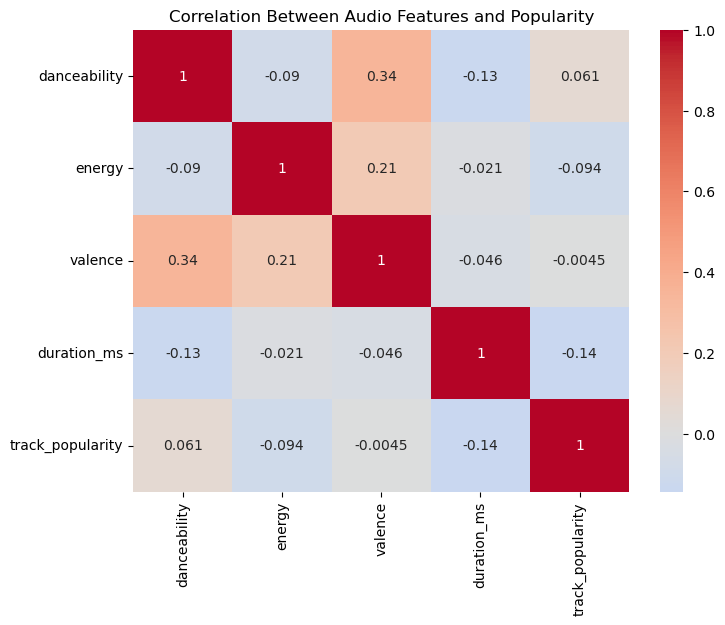

In [9]:
# Correlation analysis between features and track_popularity
features = ['danceability', 'energy', 'valence', 'duration_ms', 'track_popularity']
correlation_matrix = df[features].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Audio Features and Popularity')
plt.show()
